Name: Venkatdinesh, TSF-GRIP_INTERNSHIP


### Task - 1: 


# Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


Simple linear regression is a linear approach to modeling the relationship between a dependent variable and an independent variable, obtaining a line that best fits the data.
y =mx+c
where x is the independent variable (Scores), y is the dependent variable (Hours),  m is the slope, and C is the intercept.


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
url= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df= pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#Checking the overall data

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


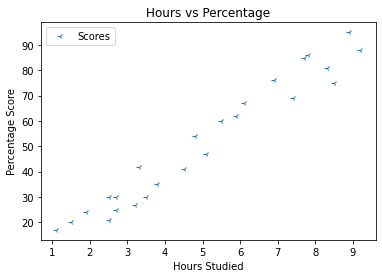

In [8]:
#sns.pairplot(df, x_vars=['Scores'], y_vars='Hours', size=8, aspect=3)
df.plot(x='Hours', y='Scores', style='3')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**


**PREPROCESSING & Train and Test split**

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

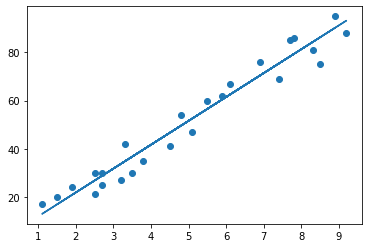

In [12]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**To retrieve the intercept:**

In [13]:
print(regressor.intercept_)

2.018160041434683


In [14]:
print(regressor.coef_)

[9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%

**MAKING PREDICTIONS**

In [19]:
y_pred = regressor.predict(X_test)

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job